# Neuronale Netze
Zunächst soll an einem einfachen Beispiel des Überwachten Lernens gezeigt werden, was eine häufige Aufgabe von KI ist:
Sehr oft sollen Muster in Daten antrainiert werden. Es soll z.B. Anhand der Länge und der Breite die Pflanzensorte bestimmt werden.
Im folgenden Beispiel gibt es einen kleinen Datensatz zu den Pflanzen Enzian und Mohn.
Es ist nun die Aufgabe, diese Daten in zwei Klassen einzuteilen.

Als erstes kann man sich als Mensch per Diagramm eine Übersicht verschaffen (das braucht eine KI/Maschine nicht).

Die dazu nötigen Bibliotheken kann man per ```bash
pip install ipywidgets``` usw. im CMD.exe Prompt in Anaconda nachinstallieren.

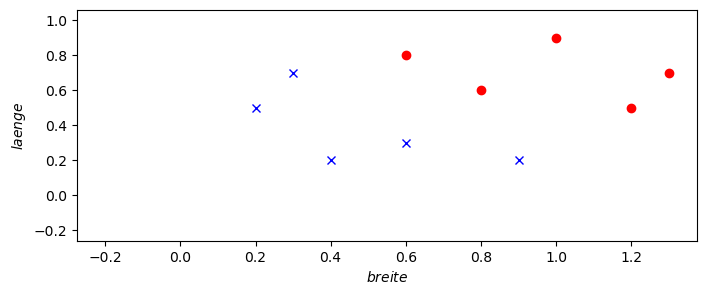

In [ ]:
%matplotlib inline
from ipywidgets import interact, IntSlider, ToggleButtons, FloatRangeSlider
from numpy import linspace, exp, sign, array, square
import matplotlib.pyplot as plt
from IPython.display import display


## Plot parameters
breiteEnzian = [0.3, 0.9, 0.2, 0.4, 0.6]
laengeEnzian = [0.7, 0.2, 0.5, 0.2, 0.3]

breiteMohn = [1.0, 0.8, 1.2, 0.6, 1.3]
laengeMohn = [0.9, 0.6, 0.5, 0.8, 0.7]

fig = plt.figure(figsize=(8,3))
ax  = fig.add_subplot(1, 1, 1)
plt.xlabel(r'$breite$')
plt.ylabel(r'$laenge$')
plt.plot([-0.2, 1], [-0.2, 1], '--', color="white")
plt.plot(breiteEnzian, laengeEnzian, 'x', color="blue")
plt.plot(breiteMohn, laengeMohn, 'o', color="red")
plt.show()



Jeder blaue Punkt entspricht einem Datensatz von Enzian, jeder rote einem Datensatz von Mohn.
Nun ist die Aufgabe, eine Trennlinie zu finden, die die Daten in zwei Klassen (Enzian und Mohn) aufteilt.
Zum Beispiel so: 


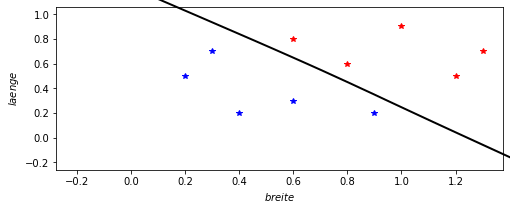

Wenn man nun neue, unbekannte Daten hat, so kann man entscheiden lassen, ob es sich um Daten von Enzian oder Mohn handelt, indem man schaut, auf welcher Seite der Linie sie sich befinden.

Um diese Linie (konkreter werden dies Hyperebenen, also mehrdimensionale Trennebenen) zu erhalten, hat man sich das Gehirn mit seinen Neuronen zum Vorbild genommen. Jedes Neuron funktioniert wie ein Schalter, der Aktiviert wird, wenn genügend Reize am Eingang vorhanden sind. Dann sendet es einen Reiz an seinem Ausgang heraus, der wiederum zu anderen Neuronen führen kann.


```mermaid
flowchart LR
    I1((Input<sub>1</sub>))
    I2((Input<sub>2</sub>))
    I3((Input<sub>...</sub>))
    N1((Neuron))
    O1(( ))
    O2(( ))
    O3(( ))
    I1 --Weight<sub>1</sub>--> N1
    I2 --Weight<sub>2</sub>--> N1
    I3 --Weight<sub>...</sub>--> N1
    N1 --> O1
    N1 --> O2
    N1 --> O3
    style O1 fill:transparent,stroke:transparent
    style O2 fill:transparent,stroke:transparent
    style O3 fill:transparent,stroke:transparent
```

In der Informatik sind die Ein- und Ausgangswerte einfach Zahlen. Pro Eingang werden die Werte außerdem gewichtet. Das Neuron verknüpft die eingehenden Werte mit den Gewichtungen einfach, indem es die gewichtete Summe bildet. Also

$Input_1\cdot Weight_1 + Input_2\cdot Weight_2 + Input_3\cdot Weight_3 + ...$

\
Die Neuronen können theoretisch beliebig viele Eingänge haben. Wir benötigen für unser Beispiel nur 2 (Breite und Länge).

\
Für unser Beispiel ergibt sich zunächst ein neuronales Netz mit zwei Eingangsneuronen (Breite und Länge) und einem Ausgangsneuron, das einen von zwei Werten annehmen soll (1=Enzian und 0=Mohn).
Die Gewichte werden ab jetzt mit $w$ bezeichnet (engl. weight).

```mermaid
flowchart LR
    I1((Länge))
    I2((Breite))
    N1((Output))
    I1 --w<sub>1</sub>--> N1
    I2 --w<sub>2</sub>--> N1
```


Es ergeben sich also folgende Formeln:

 $Output = Länge\cdot w_1 + Breite\cdot w_2$

\
Nach der allg. Geradengleichung $y = mx + t$ ist der Gewichtungsfaktor $w_x$ wie eine Art Steigung zu verstehen. Wobei x jeweils die Breite oder Länge, $t=0$ und $m=w_x$.
Die Linie dreht sich also bei Änderung der Gewichte um den 0-Punkt, da nur die Steigung beeinflusst wird.

 \
 Nun betrachten wir, was die Gewichte $w_1, w_2$ für einen Einfluss auf die Trennlinie haben:

In [7]:
def interaktPlot():
  laenge = linspace(-1, 1, 100)
  breite = linspace(-1, 1, 100)
  fig = plt.figure(figsize=(8,3))
  ax  = fig.add_subplot(1, 1, 1)
  plt.xlabel(r'$breite$')
  plt.ylabel(r'$laenge$')
  plt.plot([-0.2, 1], [0,0], '--', color="gray")
  plt.plot([0,0], [-0.2, 1], '--', color="gray")
  plt.plot(breiteEnzian, laengeEnzian, 'x', color="blue")
  plt.plot(breiteMohn, laengeMohn, 'o', color="red")
  line, = plt.plot([], [], color="black", linewidth=2)
  plt.close()

  def aktualisieren(w1, w2):
    line.set_data(breite*(w1), laenge*(w2))
    display(fig)

  interact(aktualisieren,
            w1     = IntSlider(min=-10, max=10, value=1, description="w1"),
            w2     = IntSlider(min=-10, max=10, value=1, description="w2"))

interaktPlot();


interactive(children=(IntSlider(value=1, description='w1', max=10, min=-10), IntSlider(value=1, description='w…

So ist das Problem noch nicht lösbar, da auch eine Verschiebung der Trennlinie nötig ist und nicht nur eine Rotation um den 0-Punkt.

Dies erreicht man durch das Einführen eines Versatzes (Bias). Die Gleichungen werden nun zu:

$Output = Länge\cdot w_1 + Breite\cdot w_2 +b_1$

In [10]:
def interaktPlotBias():
  laenge = linspace(-1, 1, 100)
  breite = linspace(-1, 1, 100)
  fig = plt.figure(figsize=(8,3))
  ax  = fig.add_subplot(1, 1, 1)
  plt.xlabel(r'$breite$')
  plt.ylabel(r'$laenge$')
  plt.plot([-0.2, 1], [0,0], '--', color="gray")
  plt.plot([0,0], [-0.2, 1], '--', color="gray")
  plt.plot(breiteEnzian, laengeEnzian, 'x', color="blue")
  plt.plot(breiteMohn, laengeMohn, 'o', color="red")
  line, = plt.plot([], [], color="black", linewidth=2)
  plt.close()

  def aktualisieren(w1, w2, b1):
    line.set_data(breite*w1 + b1/10, laenge*w2 + b1/10)
    display(fig)


  interact(aktualisieren,
            w1     = IntSlider(min=-10, max=10, value=1, description="w1"),
            w2     = IntSlider(min=-10, max=10, value=1, description="w2"),
            b1     = IntSlider(min=-10, max=10, value=0, description="b1")
          )

interaktPlotBias();

interactive(children=(IntSlider(value=1, description='w1', max=10, min=-10), IntSlider(value=1, description='w…

Finde eine geeignete Wahl der Gewichte und Bias (z.B. 2,-2,6)


Der Computer (die künstliche Intelligenz) soll nun also diese Werte ermitteln.
Dazu braucht man Daten, von denen man schon weiß, wozu sie gehören. Wie in unserem Beispiel oben Breiten und Längen für Mohn und Enzian. Anhand dieser Daten kann die KI lernen (Trainings-Dataset).

Es werden meist zufällige Startwerte für die Gewichte und Bias gewählt und auf die Daten angewendet. Dann schaut man, wie groß der Fehler ist, der gemacht wurde (wie sehr die geratene Linie daneben liegt) und passt mit diesem Fehler die Gwichte und Bias an.

Darauf folgt ein neuer Durchgang mit den korrigierten Gewichten und Bias. Wenn die Fehlerrückkopplung und das Modell gut gewählt ist, so wird der Fehler nahe 0 konvergieren und man hat irgendwann eine möglichst optimale Trennlinie gefunden.

Dass die Klassifikation möglichst genau erfolgen kann, benötigt man möglichst viele Daten. Dadurch wird der Trainingsvorgang sehr rechenintensiv. Die daraus ermittelten Gewichte und Bias sind Zahlen, die man abspeichern kann und für Klassifikaiton neuer, unbekannter Daten verwenden kann. Dies kostet dann nicht mehr so viel Rechenleistung.

Es gibt internationale Wettbewerbe, in denen vortrainierte KIs gegeneinander antreten. Es gibt viele Anbieter von solchen vortrainierten Netzen, je nach Anwendungsfall:
[OpenAI](https://openai.com/blog/openai-api/)
[Yolo](https://github.com/ultralytics/yolov5)
[Größe von Yolov5](https://github.com/ultralytics/yolov5/issues/3416)









Nun trainieren wir ein einzelnes Neuron mit unseren Daten. Mohn soll 0 und Enzian 1 sein.


Liegen die Daten so verteilt vor, dass eine lineare Trennlinie genügt, so hat man Glück. Meist enthalten Daten aber Nichtlinearitäten.

Um solche Nichtlinearitäten berücksichtigen zu können, führt man nichtlineare Aktivierungsfunktionen ein. Hier eine Übersicht der gängigsten:



Step: Gibt $1$ zurück, wenn $x\ge 0$, sonst $0$


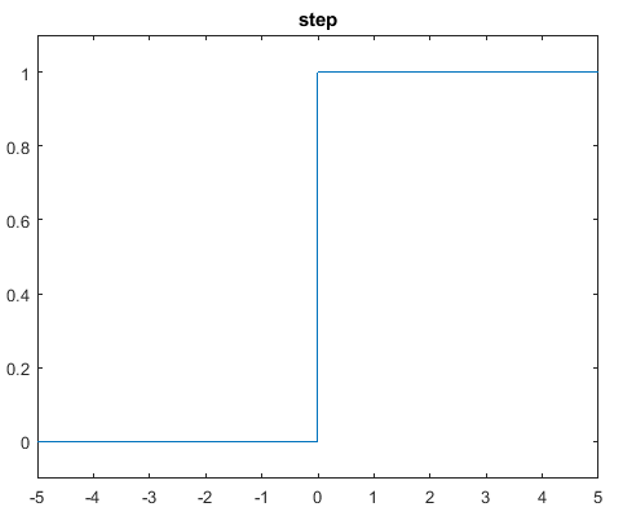

Hyprbeltangens:

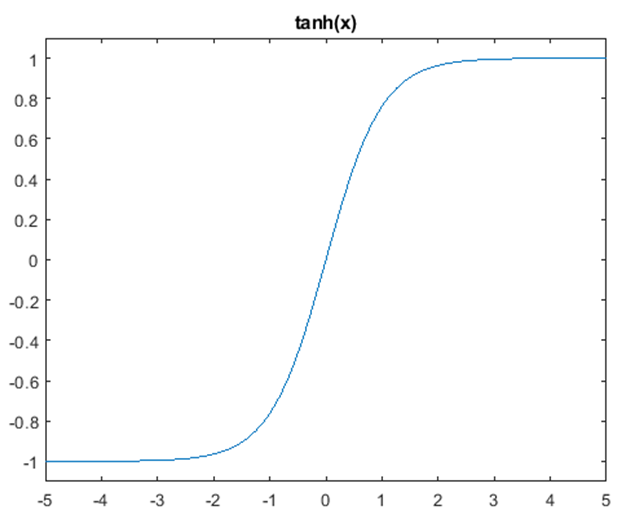

ReLU: Gibt $x$ zurück, wenn $x\ge 0$, sonst $0$

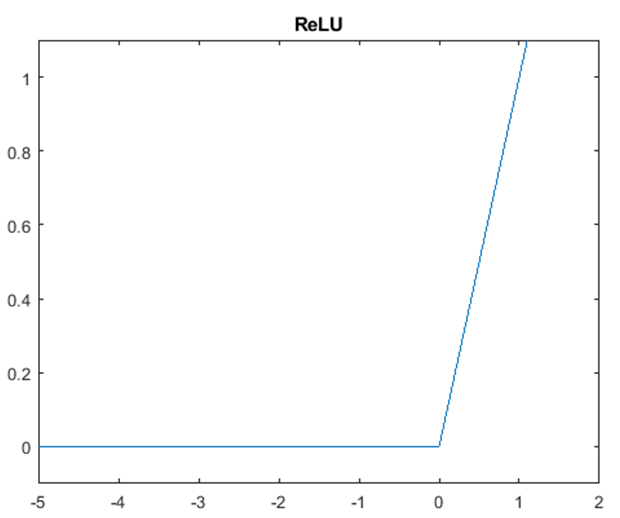

Sigmoid: $sigmoid(x) = \frac{1}{1+e^{-x}}$

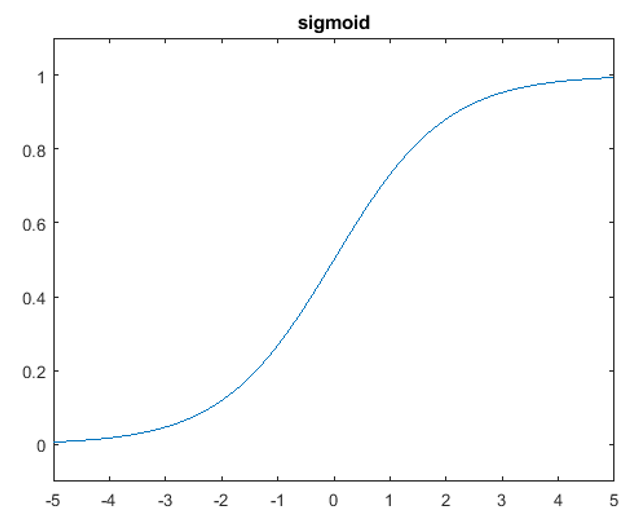